In [1]:
import Fit
from Fit import *
import plot
from plot import *
import postprocess
from postprocess import *

2023-03-13 16:02:22.549096: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-03-13 16:02:22.614316: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-03-13 16:02:22.622805: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIB

In [2]:
from importlib import reload
import pickle

In [3]:
reload(Fit)
from Fit import *
reload(plot)
from plot import *
reload(postprocess)
from postprocess import *

In [4]:
ROOT_PATH = current_folder = globals()['_dh'][0]
FIT_SAVE_PATH = os.path.join(ROOT_PATH, "pickle/fits")

In [11]:
run_string_prefixes = [f"0305_lm_22_convergence_test33_{i}" for i in range(2, 25)]

t0_arr = np.linspace(0, 1, num = 11)
qnm_fixed_list = []
N_free = 10
nonconvergence_cut = False

results = [get_result(
    run_string_prefix, 
    t0_arr, qnm_fixed_list,
    N_free, nonconvergence_cut = nonconvergence_cut
                      )
           for run_string_prefix in run_string_prefixes]

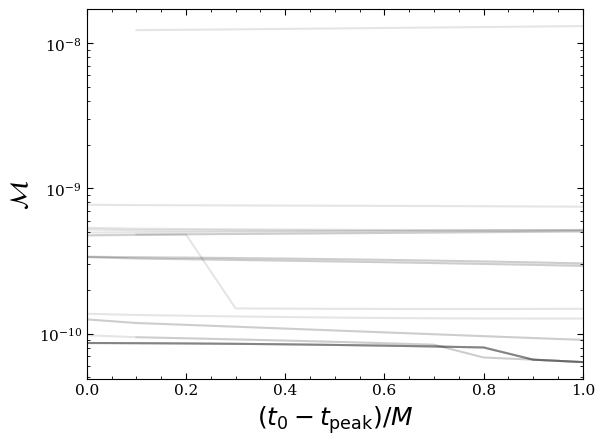

In [12]:
fig, ax = plt.subplots()

make_ax = True
for k, result in enumerate(results):
    # if k == 4 or k == 5 or k == 6 or k == 8 or k == 0:
    #     if k == 6:
    #         pass
    #     else:
    #         continue
    plot_mismatch(result, ax = ax, 
                  c = 'k', #f"C{k}",
                  make_ax = make_ax,
                  alpha = 0.1)
    make_ax = False

In [74]:
seed = 1234
guess_num = 10
rng = np.random.RandomState(seed)
A_guesses = 10**(rng.uniform(-1, 1, size = (guess_num, N_free)))
phi_guesses = rng.uniform(0, 2*np.pi, size = (guess_num, N_free))
omegar_guesses = rng.uniform(0, 2, size = (guess_num, N_free))
omegai_guesses = rng.uniform(0, -1, size = (guess_num, N_free))

In [75]:
guesses_stack = np.empty((guess_num, 4 * N_free), dtype = A_guesses.dtype)
guesses_stack[:,0::4] = A_guesses 
guesses_stack[:,1::4] = phi_guesses 
guesses_stack[:,2::4] = omegar_guesses
guesses_stack[:,3::4] = omegai_guesses

guess_list = [list(guess) for guess in guesses_stack]

In [76]:
np.array(guess_list[0]).reshape((N_free, 4))

array([[ 0.24156772,  4.81993593,  1.95807764, -0.28587767],
       [ 1.75475926,  4.44922004,  1.76246449, -0.98674722],
       [ 0.75068109,  5.00686418,  1.25536384, -0.43180085],
       [ 3.72149267,  3.50451464,  1.86097307, -0.57423441],
       [ 3.63037607,  6.06852991,  1.44957991, -0.52724208],
       [ 0.35090149,  0.92461407,  1.43335577, -0.19765305],
       [ 0.35721403,  0.1862776 ,  0.08215713, -0.16570843],
       [ 4.01554369,  3.73154287,  0.87896355, -0.50099046],
       [ 8.24667173,  0.71669592,  0.56413957, -0.99020406],
       [ 5.64761742,  5.97411448,  0.66999194, -0.39399181]])

In [77]:
np.array(guess_list[0]).reshape((N_free, 4))

array([[ 0.24156772,  4.81993593,  1.95807764, -0.28587767],
       [ 1.75475926,  4.44922004,  1.76246449, -0.98674722],
       [ 0.75068109,  5.00686418,  1.25536384, -0.43180085],
       [ 3.72149267,  3.50451464,  1.86097307, -0.57423441],
       [ 3.63037607,  6.06852991,  1.44957991, -0.52724208],
       [ 0.35090149,  0.92461407,  1.43335577, -0.19765305],
       [ 0.35721403,  0.1862776 ,  0.08215713, -0.16570843],
       [ 4.01554369,  3.73154287,  0.87896355, -0.50099046],
       [ 8.24667173,  0.71669592,  0.56413957, -0.99020406],
       [ 5.64761742,  5.97411448,  0.66999194, -0.39399181]])

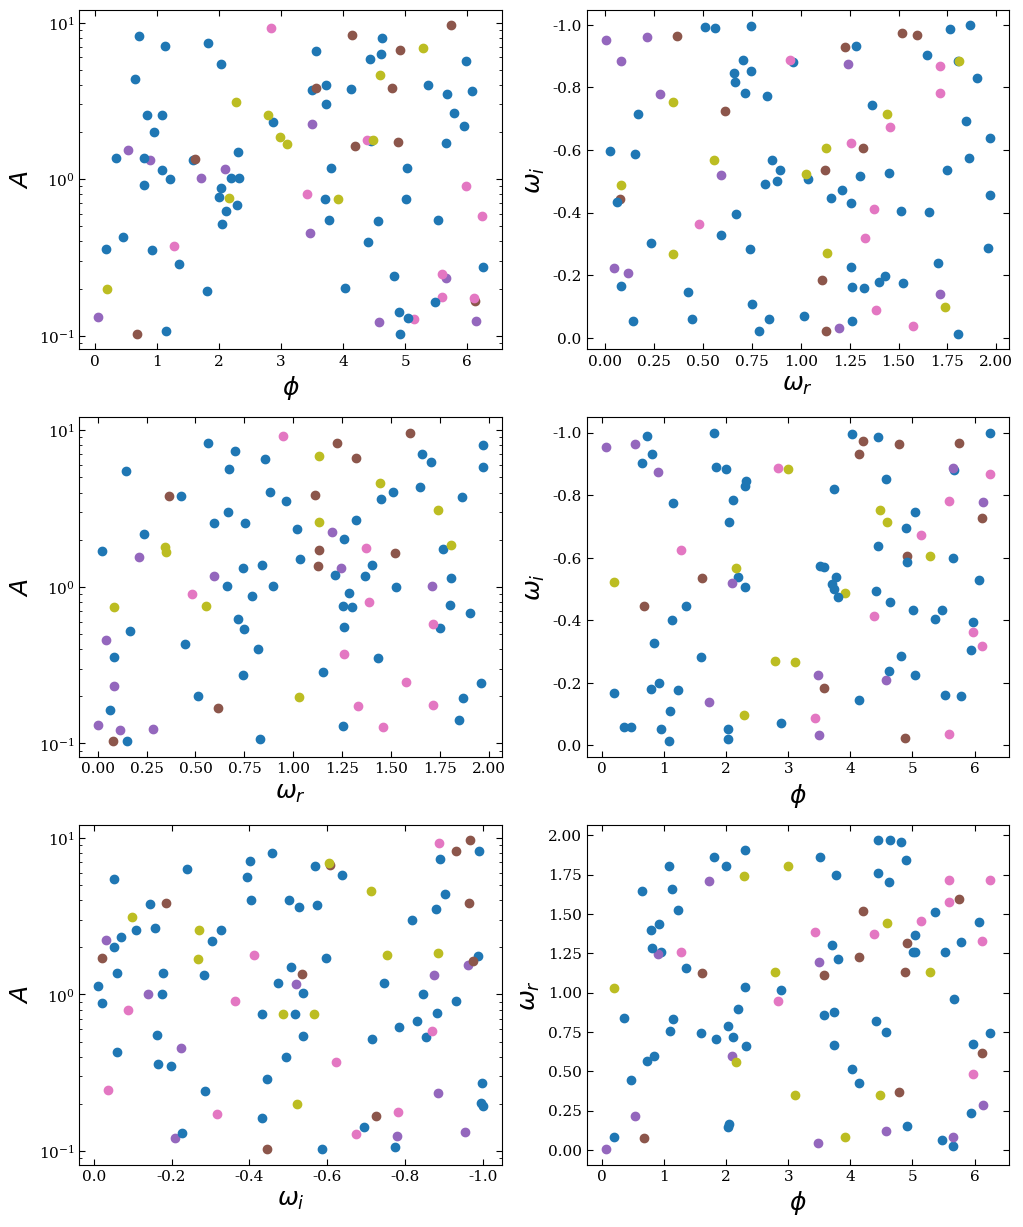

In [78]:
fig, axs = plt.subplots(3, 2, figsize = (12, 15))

color_i = 0
for k in range(guess_num):
    if k == 4 or k == 5 or k == 6 or k == 8 or k == 0:
        color = f"C{k}"
        # if k == 6:
        #     color = f"C{k}"
        # else:
        #     continue
    else:
        color = "C0"
    guess_arr = np.array(guess_list[k]).reshape((N_free, 4)).T
    A_arr = guess_arr[0]
    phi_arr = guess_arr[1]
    omegar_arr = guess_arr[2]
    omegai_arr = guess_arr[3]
    axs[0,0].scatter(phi_arr, A_arr, c = color)
    axs[0,1].scatter(omegar_arr, omegai_arr, c = color)
    axs[1,0].scatter(omegar_arr, A_arr, c = color)
    axs[1,1].scatter(phi_arr, omegai_arr, c = color)
    axs[2,0].scatter(omegai_arr, A_arr, c = color)
    axs[2,1].scatter(phi_arr, omegar_arr, c = color)

axs[0,0].set_xlabel(r"$\phi$")
axs[0,0].set_ylabel(r"$A$")
axs[0,0].set_yscale("log")
axs[0,1].set_xlabel(r"$\omega_r$")
axs[0,1].set_ylabel(r"$\omega_i$")
axs[0,1].invert_yaxis()
axs[1,0].set_xlabel(r"$\omega_r$")
axs[1,0].set_ylabel(r"$A$")
axs[1,0].set_yscale("log")
axs[1,1].set_xlabel(r"$\phi$")
axs[1,1].set_ylabel(r"$\omega_i$")
axs[1,1].invert_yaxis()
axs[2,0].set_xlabel(r"$\omega_i$")
axs[2,0].set_ylabel(r"$A$")
axs[2,0].set_yscale("log")
axs[2,1].set_xlabel(r"$\phi$")
axs[2,1].set_ylabel(r"$\omega_r$")
axs[2,0].invert_xaxis()

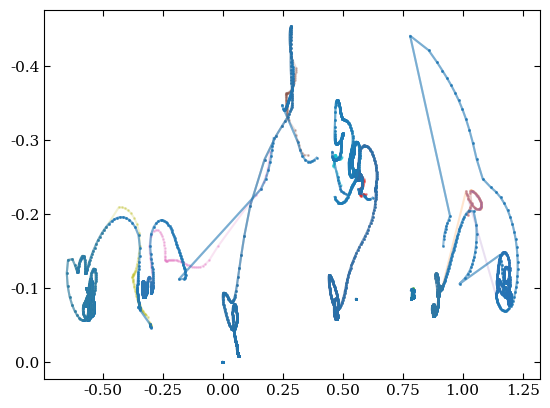

In [65]:
fig, ax = plt.subplots()

for k, result in enumerate(results):
    if k == 4 or k == 5 or k == 6 or k == 8 or k == 0:
        if k == 0:
            color = None
        else:
            continue
    else:
        color = 'C0'
    plot_omega_free(result, ax = ax, color = color, line_alpha = 0.2, scatter_alpha = 0.3)
    
# ax.invert_yaxis()